**Write down a Matlab or Python code to simulate the averaging dynamics with stubborn node
set S = {Medici; Strozzi} and opinions u[medici] = 1 and u[strozzi] = -1**

Util functions to solve the exercise 3

In [14]:
def map_label_index(nodes):
    indices = dict()
    for i in range(len(nodes)):
        indices[list(nodes)[i]] = i
        
    return indices,len(indices)

def create_graph(nodes,edges):
    G = nx.Graph()
    G.add_nodes_from(florence_families)
    G.add_edges_from(links)
    return G

def get_P_matrix(G):
    A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A
    
    return P

def get_submatrices(P,regular_id,stubborn_id):
    # Submatrices
    # Using ix_ one can construct index arrays that will 
    # index a cross product.
    
    #For instamce:
    # a[np.ix_([1,3],[2,5])] returns the array [[a[1,2] a[1,5]], [a[3,2] a[3,5]]].
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]
    
    return Q,E

def evolve(x,n_iter,regular_id,stubborn_id,Q,E):
    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];
    
    return x[:,n_iter-1]

In [15]:
import networkx as nx
import numpy as np




#Creating graph of florence_families
florence_families = ['Lamberteschi','Guadagni','Bischeri','Peruzzi','Strozzi','Tornabuoni','Ridolfi','Albizzi','Ginori','Barbadori','Medici','Salviati','Pazzi','Acciaiuoli','Castellani']


links = [('Lamberteschi', 'Guadagni'), ('Guadagni','Albizzi'), ('Guadagni','Tornabuoni'), 
             ('Guadagni','Bischeri'), ('Bischeri','Peruzzi'), ('Bischeri','Strozzi'), ('Peruzzi','Castellani'), 
             ('Peruzzi','Strozzi'), ('Strozzi','Castellani'), ('Strozzi', 'Ridolfi'), ('Ridolfi','Medici'), 
             ('Castellani', 'Barbadori'), ('Barbadori','Medici'), ('Tornabuoni', 'Medici'), ('Albizzi','Medici'), 
             ('Albizzi','Ginori'),('Medici','Acciaiuoli'),('Medici','Salviati'),('Salviati','Pazzi')]

G = create_graph(florence_families,links)

# Construct a dictionary that maps the label of nodes  

label_index,n_nodes = map_label_index(G.nodes)

# Number of iterations
n_iter = 50;
    
# Stubborn and regular nodes
stubborn = ["Medici","Strozzi"];
stubborn_id = [label_index.get(key) for key in stubborn]
regular = [node for node in G.nodes if node not in stubborn]
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]

# Input to stubborn nodes
u = [1,-1]

# P matrix
P = get_P_matrix(G)

# Q,E submatrix of P, selected accordingly to the choosen regular nodes and stubborn nodes
Q,E = get_submatrices(P,regular_id,stubborn_id)

# Sample a random initial condition for regular nodes
ic = np.random.uniform(0,1,len(regular))

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;

#Displaying the initial condition
print("Initial condition:\n")
for i,fam in enumerate(florence_families):
    print("\t",fam,":", x[i,0])
    
# Evolve the opinion vector
x_final = evolve(x,n_iter,regular_id,stubborn_id,Q,E)

#Displaying the equilibrium vector
print("\n\nEquilibrium vector:\n")
for key in label_index.keys():
    print("\t",key, x_final[label_index[key]])


Initial condition:

	 Lamberteschi : 0.4173394158212741
	 Guadagni : 0.637951683828963
	 Bischeri : 0.43653485372749545
	 Peruzzi : 0.25394036343978155
	 Strozzi : -1.0
	 Tornabuoni : 0.3603337973462736
	 Ridolfi : 0.7062446341561498
	 Albizzi : 0.7618103639058813
	 Ginori : 0.3243441693957011
	 Barbadori : 0.42511180113418734
	 Medici : 1.0
	 Salviati : 0.7624325126113394
	 Pazzi : 0.3107102046828415
	 Acciaiuoli : 0.6303610657773953
	 Castellani : 0.6698475882918008


Equilibrium vector:

	 Lamberteschi 0.272739944266165
	 Guadagni 0.2727384621224072
	 Bischeri -0.45454003348570093
	 Peruzzi -0.6363604648242962
	 Strozzi -1.0
	 Tornabuoni 0.6363699721330824
	 Ridolfi 0.0
	 Albizzi 0.6363722735035462
	 Ginori 0.6363753276237629
	 Barbadori 0.27272836105366244
	 Medici 1.0
	 Salviati 0.9999999794575634
	 Pazzi 0.9999999858398743
	 Acciaiuoli 1.0
	 Castellani -0.45454384650343627


**Plot the trajectories of
the different states**

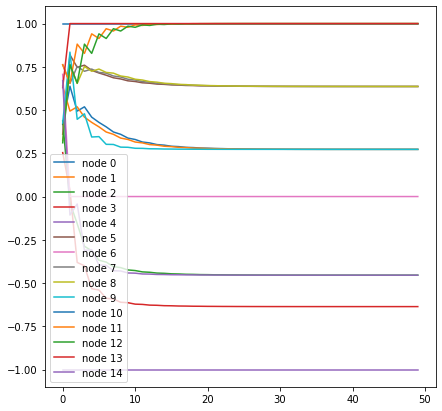

In [20]:
import matplotlib.pyplot as plt
    
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

**Write down a Matlab or Pythoncode for the iterative distributed computation of the PageRank
centrality in the network with beta = 0:15 and uniform input.**

In [19]:
n_iter = 100
beta = 0.15

intr_centrality = np.ones(n_nodes)/n_nodes


y = np.random.uniform(0,1,n_nodes)
#Evolve the system 
for _ in range(n_iter):
    y = (1-beta)*P.T @ y + beta*intr_centrality

    
print(f"Page rank centrality (beta={beta})\n")
for i,fam in enumerate(families):
    print("\t",fam,":", y[i])

Page rank centrality (beta=0.15)

	 Lamberteschi : 0.03202361270141346
	 Guadagni : 0.10364052130291306
	 Bischeri : 0.07152745099128631
	 Peruzzi : 0.07018675144820488
	 Strozzi : 0.09231806222254475
	 Tornabuoni : 0.05384755399410703
	 Ridolfi : 0.05144153142875734
	 Albizzi : 0.08212631068820904
	 Ginori : 0.033269123254251264
	 Barbadori : 0.05212698958763654
	 Medici : 0.15405133671043983
	 Salviati : 0.06312946352993962
	 Pazzi : 0.03683002389108802
	 Acciaiuoli : 0.03182394129269357
	 Castellani : 0.07165781076521452
